<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

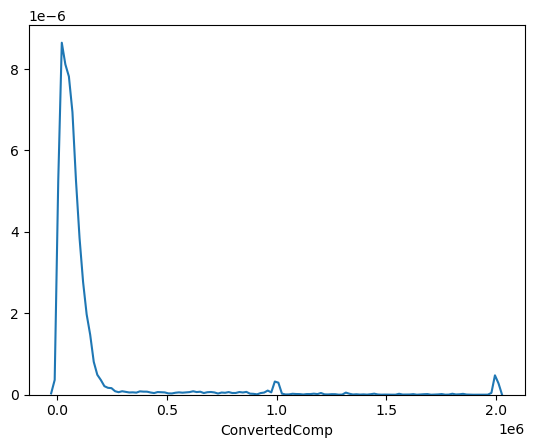

In [4]:
# your code goes here
import seaborn as sns
sns.distplot(df['ConvertedComp'],hist=False)

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'USD')

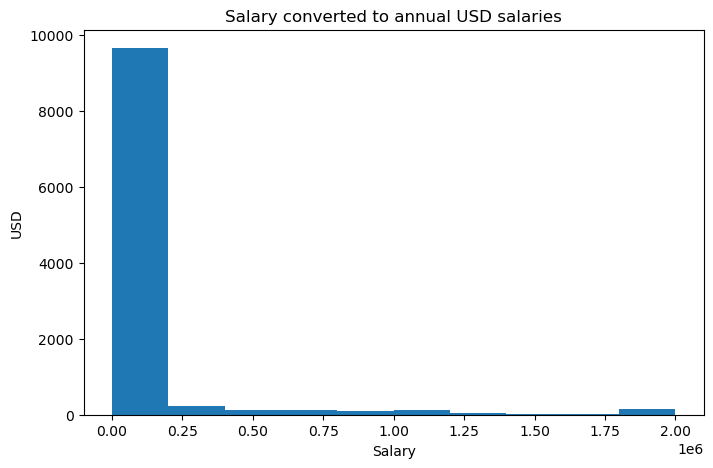

In [5]:
# your code goes here
import matplotlib.pyplot as plt

df['ConvertedComp'].plot(kind='hist',figsize=(8,5))

plt.title('Salary converted to annual USD salaries')
plt.xlabel('Salary')
plt.ylabel('USD')

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
c_median=df['ConvertedComp'].median()
print("The median of the column ConvertedComp is",c_median)

The median of the column ConvertedComp is 57745.0


In [23]:
# median Age of survey respondents
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
num_man=len(df[df['Gender']=='Man'])
print(num_man,"responders identified themselves only as a Man")

10480 responders identified themselves only as a Man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
r_women=df[df['Gender']=='Woman']
print("The median ConvertedComp of responders identified themselves only as a woman is",r_women['ConvertedComp'].median())

The median ConvertedComp of responders identified themselves only as a woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Age Distribution of the Responders')

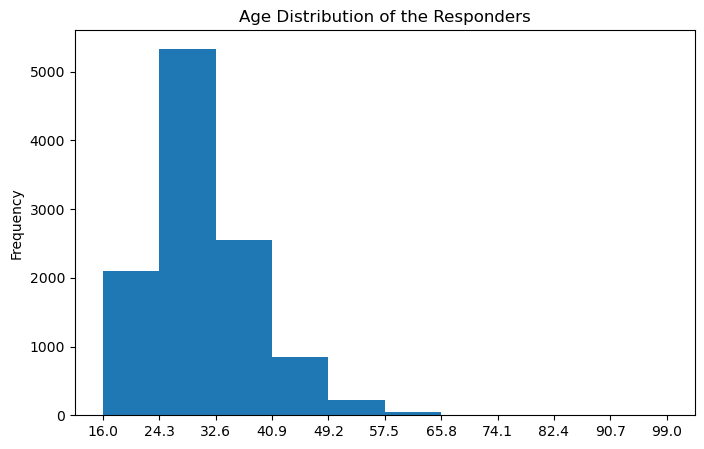

In [26]:
# your code goes here
import numpy as np
count, bin_edges = np.histogram(df['Age'].dropna())

df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title("Age Distribution of the Responders")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Outliers in ConvertedComp')

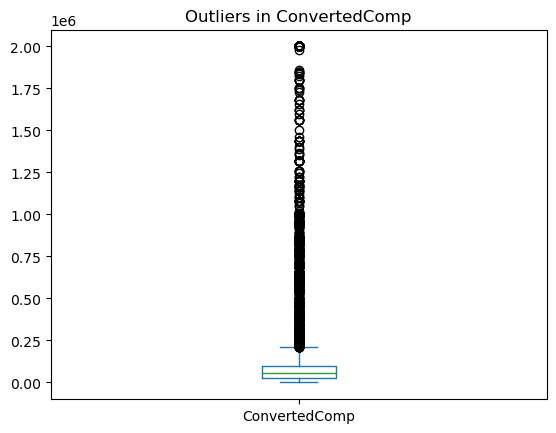

In [12]:
# your code goes here
df['ConvertedComp'].plot(kind='box')
plt.title("Outliers in ConvertedComp")

In [27]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
print("The Inter Quartile Range for the column ConvertedComp is",q3-q1)

The Inter Quartile Range for the column ConvertedComp is 73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
IQR=q3-q1
l=q1-1.5*IQR
u=q3+1.5*IQR

print("The upper bound of ConvertedComp boxplot is",u)
print("The lower bound of ConvertedComp boxplot is",l)

The upper bound of ConvertedComp boxplot is 209698.0
The lower bound of ConvertedComp boxplot is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
n_outliers=((df['ConvertedComp']<l)|(df['ConvertedComp']>u)).sum()
print("There are",n_outliers,"outliers in the ConvertedComp column")

There are 879 outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
df_new=df[(df['ConvertedComp']>l )& (df['ConvertedComp']<u)]
df_new['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

<AxesSubplot:>

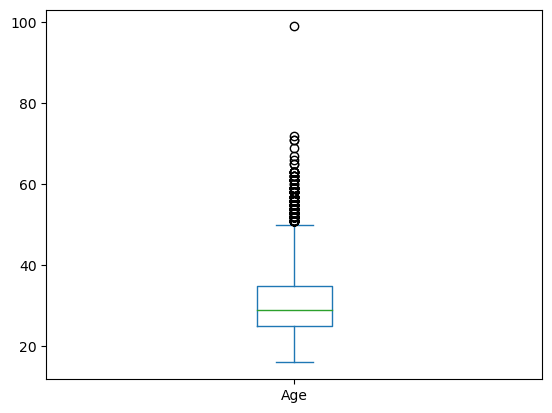

In [33]:
#boxplot of age
df['Age'].plot(kind='box')

In [32]:
# boxplot of Age (outliers below Q1)
age_q1=df['Age'].quantile(0.25)
n_outliers=(df['Age']<age_q1).sum()
print(n_outliers)

2096


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here
# Correlations of Origin DataFrame
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [22]:
# Correlations of new DataFrame
df_new.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
